In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
comhealth = pd.read_csv('nta-metadata.csv')
comhealth = comhealth.drop(0)
def diversity(nta_series):
    diversity_series = []
    races = ['Hispanic', 'WhiteNonHisp', 'BlackNonHisp', 'AsianPI', 'OtherRace', 'ForeignBorn']
    for nta in nta_series:
        index = pd.Index(nta_series).get_loc(nta) + 1
        makeup = np.array([comhealth.loc[index, races[i]] for i in range(len(races))])
        diversity = np.sqrt(np.sum(np.square(makeup)))
        diversity_series.append(diversity)
    return pd.Series(diversity_series)

comhealth['DiversityScore'] = diversity(comhealth.NTA_Code)
comhealth['DiversityScore']
keep = ['NTA_Code', 'TotalPop', 'NYCHAperc', 'PreventHosp', 'DiversityScore']
comhealth = comhealth[keep]
comhealth.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 6 columns):
NTA_Code          195 non-null object
TotalPop          188 non-null float64
NYCHAperc         188 non-null float64
PreventHosp       188 non-null float64
DiversityScore    187 non-null float64
HealthIns         188 non-null float64
dtypes: float64(5), object(1)
memory usage: 15.7+ KB


In [69]:
def impute_median(series):
    series = series.fillna(series.median())
    return series

for colname, oldcol in {'Total Population':'TotalPop', 'Percentage Living in Public Housing': 'NYCHAperc', 'Preventable Hospitalizations':'PreventHosp', 'Multiethnicity':'DiversityScore', 'Percentage of Residents With Health Insurance':'HealthIns'}.items():
    comhealth[colname] = impute_median(comhealth[oldcol])
    comhealth.drop(cols = [oldcol], axis=1)
    


TypeError: drop() got an unexpected keyword argument 'cols'

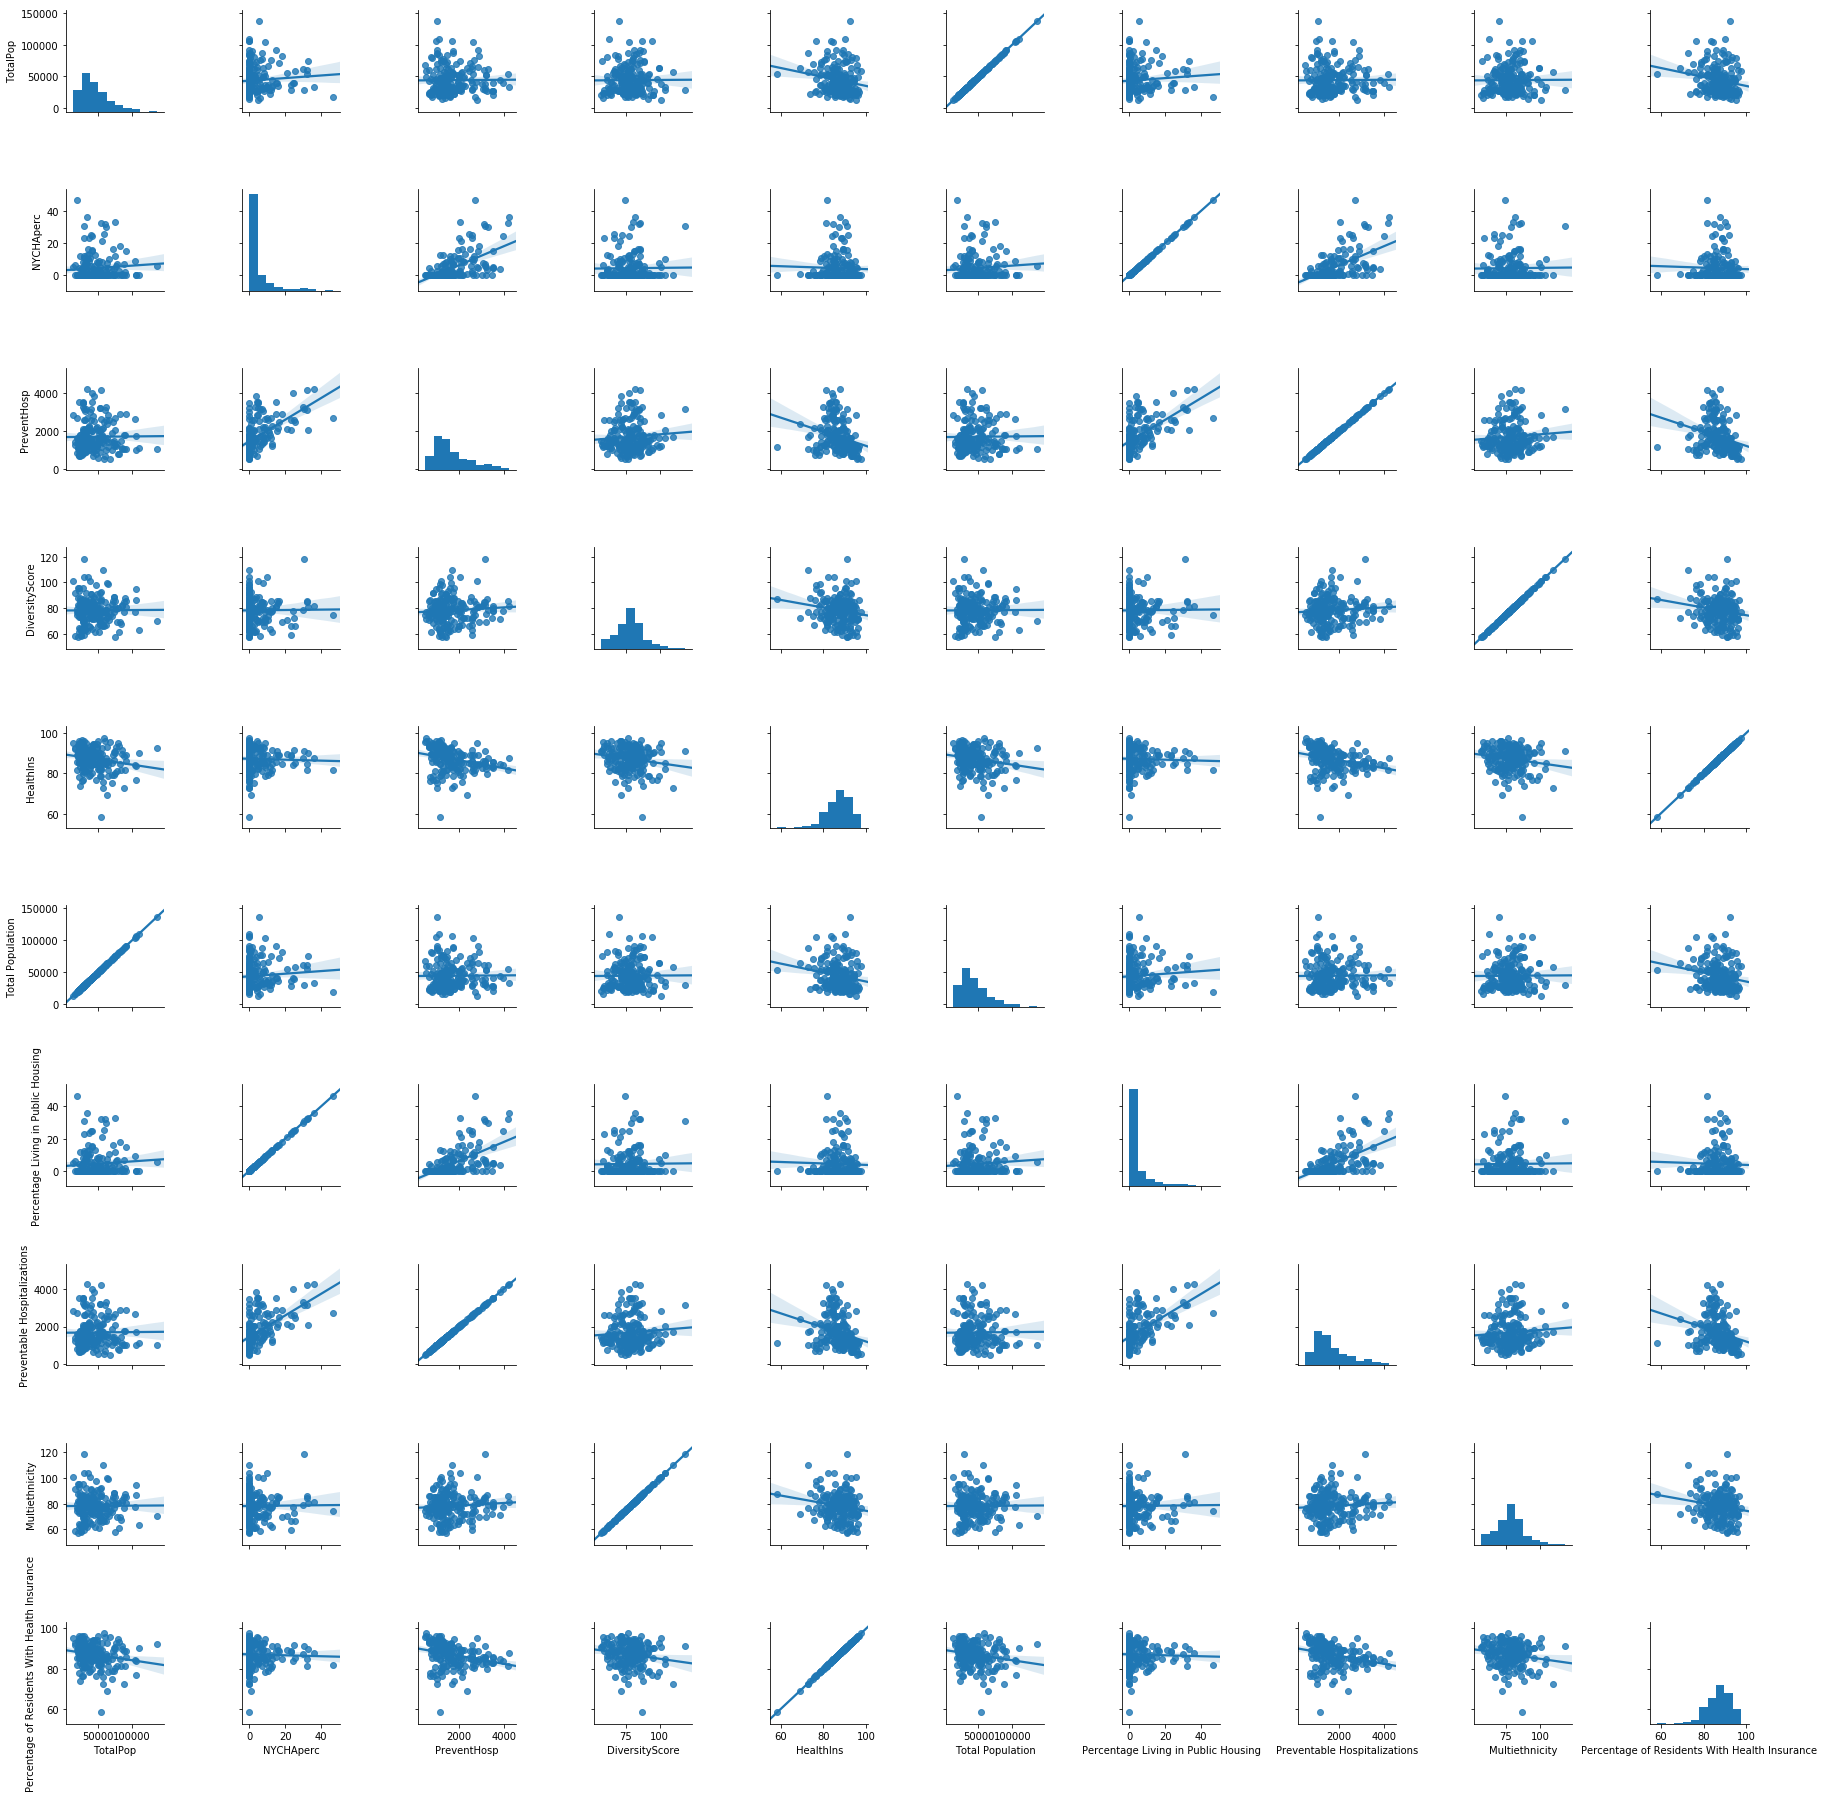

In [68]:
sns.pairplot(comhealth, kind = 'reg')

In [64]:
comhealth.to_csv('nta_data.csv')